# **workshop 1**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

# **bagging**

# créé un bagging avec KNN

In [2]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5) # créé un bagging avec KNN


# charge le dataset des chiffres manuscrits

In [2]:
digits = load_digits()

# Affichage des 10 premières images

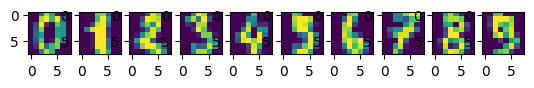

In [3]:
fig = plt.figure() # crée une figure pour afficher les images
for i, digit in enumerate(digits.images[:10]): # enumerate est utilisé pour obtenir l'index et la valeur c'est une fonction de la bibliothèque standard de Python
    fig.add_subplot(1,10,i+1) # ajoute un sous-graphique à la figure
    plt.imshow(digit) # affiche l'image du chiffre
plt.show()


In [4]:
X, y = digits.data, digits.target # charge les données et les étiquettes
clf = tree.DecisionTreeClassifier() # créé un classifieur d'arbre de décision
clf.fit(X, y) # entraîne le classifieur
accuracy = clf.score(X,y) # calcule la précision sur les données d'entraînement
print(accuracy)
# inutile car les données sont les mêmes pour l'entraînement et le test

1.0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

# meme code avec un split entrainement/test 90/10

0.7088998763906057


In [ ]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test) # cette ligne n'est pas nécessaire pour calculer l'accuracy car on peut utiliser .score directement
    accuracies.append(clf.score(X_test,y_test)) #.score clalcule l'accuracy
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies)) #std calcule l'écart-type

0.8333333333333334
0.8888888888888888
0.8777777777777778
0.8444444444444444
0.8333333333333334
0.8555555555555555
0.8111111111111111
0.8888888888888888
0.8444444444444444
0.8555555555555555
0.8222222222222222
0.8777777777777778
0.9
0.9
0.8555555555555555
0.8777777777777778
0.8666666666666667
0.7888888888888889
0.8888888888888888
0.8666666666666667
0.8444444444444444
0.8888888888888888
0.8333333333333334
0.8555555555555555
0.8555555555555555
0.8444444444444444
0.8555555555555555
0.8666666666666667
0.9111111111111111
0.8333333333333334
0.8222222222222222
0.8888888888888888
0.7777777777777778
0.8111111111111111
0.8111111111111111
0.8333333333333334
0.8777777777777778
0.8888888888888888
0.8666666666666667
0.8444444444444444
0.8444444444444444
0.8888888888888888
0.8333333333333334
0.8333333333333334
0.8444444444444444
0.9111111111111111
0.8555555555555555
0.9
0.7888888888888889
0.8888888888888888
0.8444444444444444
0.8333333333333334
0.8888888888888888
0.8111111111111111
0.8444444444444444


In [8]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200) # créé un bagging avec des arbres de décision
# max_samples est le nombre de données utilisées pour chaque estimateur et max_features le nombre de caractéristiques utilisées pour chaque estimateur
# n_estimators est le nombre d'estimateurs dans le bagging



In [10]:
clf.fit(X_train, y_train)

accuracy=clf.score(X_test,y_test)

In [13]:
n=100
accuracies = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    accuracies.append(clf.score(X_test,y_test))
    

print(np.std(accuracies), np.mean(accuracies))


0.01663367104236702 0.9741111111111113


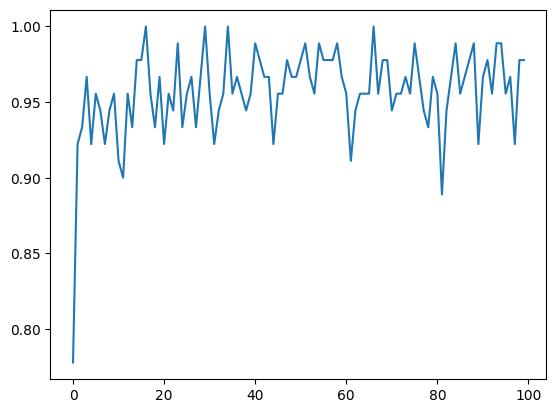

In [20]:
n=100
accuracies = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.2, max_features=0.2, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracies.append(clf.score(X_test,y_test))

plt.plot(list(i for i in range(n)), accuracies)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

pgrid = {"max_samples": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        "max_features": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        "n_estimators": [10, 20, 50]} # dictionnaire des paramètres à tester

grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=10) #cv est le nombre de folds pour la validation croisée
#gridsearchcv teste toutes les combinaisons de paramètres dans pgrid et choisit la meilleure en fonction de la moyenne des scores sur les folds

grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))
print("n_estimators: " + str(grid_search.best_estimator_.n_estimators))

Meilleur score : 0.9888888888888889
max_samples: 0.9
max_features: 0.4
n_estimators: 50


# **random forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [32]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9165636588380717


In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.646477132262052
Bagging (200 arbres) : 0.9023485784919654
Forêt aléatoire (200 arbres) : 0.9159456118665018


In [34]:
n=100
baggaccuracies = []
randoaccuracies = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.9, max_features=0.4, n_estimators=50)
    clf.fit(X_train, y_train)
    baggaccuracies.append(clf.score(X_test,y_test))

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = RandomForestClassifier(n_estimators=50)
    clf.fit(X_train, y_train)
    randoaccuracies.append(clf.score(X_test,y_test))

print("Bagging : " + str(np.mean(baggaccuracies)) + " ± " + str(np.std(baggaccuracies)))
print("Forêt aléatoire : " + str(np.mean(randoaccuracies)) + " ± " + str(np.std(randoaccuracies)))
  

Bagging : 0.972888888888889 ± 0.017092341798248364
Forêt aléatoire : 0.9753333333333335 ± 0.014279398956815416


10 0.7222222222222222
20 0.7111111111111111
30 0.8444444444444444
40 0.9111111111111111
50 0.8888888888888888
60 0.9444444444444444
70 0.9222222222222223
80 0.9222222222222223
90 0.9111111111111111
100 0.9333333333333333
110 0.9555555555555556
120 0.9555555555555556
130 0.9444444444444444
140 0.9555555555555556
150 0.9333333333333333
160 0.9555555555555556
170 0.9111111111111111
180 0.9333333333333333
190 0.9444444444444444
200 0.9555555555555556
210 0.9555555555555556
220 0.9555555555555556
230 0.9444444444444444
240 0.9555555555555556
250 0.9222222222222223
260 0.9222222222222223
270 0.9444444444444444
280 0.9555555555555556
290 0.9444444444444444
300 0.9444444444444444
310 0.9444444444444444
320 0.9222222222222223
330 0.9555555555555556
340 0.9333333333333333
350 0.9333333333333333
360 0.9555555555555556
370 0.9666666666666667
380 0.9555555555555556
390 0.9444444444444444
400 0.9555555555555556
410 0.9222222222222223
420 0.9666666666666667
430 0.9444444444444444
440 0.94444444444444

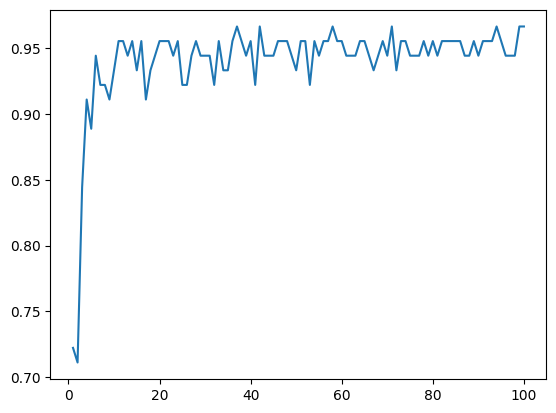

In [ ]:
N = 100
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1))
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print(accuracy[i])

plt.plot([(i+1) for i in range(N)], accuracy)
plt.show()

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

0.8222222222222222
0.8333333333333334
0.8888888888888888
0.9111111111111111
0.9
0.9333333333333333
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9666666666666667
0.9555555555555556
0.9666666666666667
0.9222222222222223
0.9666666666666667
0.9555555555555556
0.9777777777777777
0.9444444444444444
0.9666666666666667
0.9666666666666667
0.9555555555555556
0.9444444444444444
0.9666666666666667
0.9444444444444444
0.9555555555555556
0.9444444444444444
0.9666666666666667
0.9444444444444444
0.9666666666666667
0.9555555555555556
0.9444444444444444
0.9777777777777777
0.9555555555555556
0.9666666666666667
0.9555555555555556
0.9666666666666667
0.9555555555555556
0.9666666666666667
0.9666666666666667
0.9444444444444444
0.9555555555555556
0.9555555555555556
0.9444444444444444
0.9444444444444444
0.9555555555555556
0.9555555555555556
0.9555555555555556
0.9333333333333333
0.9555555555555556
0.9666666666666667
0.9555555555555556
0.9666666666666667
0.9666666666666667
0.9444444444444444
0.944444

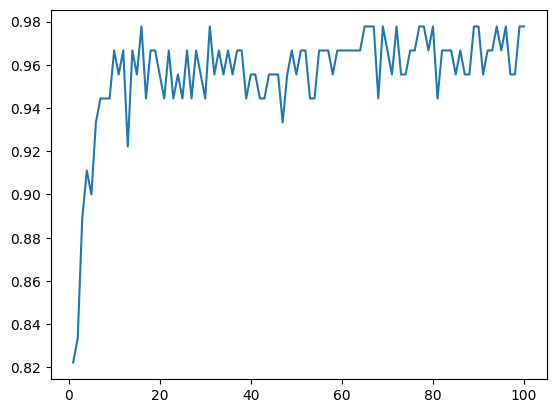

In [41]:
N = 100
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

for i in range(N):
    clf = ExtraTreesClassifier(n_estimators=(i+1))
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print(accuracy[i])

plt.plot([(i+1) for i in range(N)], accuracy)
plt.show()

In [95]:
n=50
ranacc=[]
extacc=[]
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

    clf = RandomForestClassifier(n_estimators=80)
    clf.fit(X_train, y_train)
    ranacc.append(clf.score(X_test,y_test))
    

    clf = ExtraTreesClassifier(n_estimators=80)
    clf.fit(X_train, y_train)
    extacc.append(clf.score(X_test,y_test))

print("Forêt aléatoire : " + str(np.mean(ranacc)) + " ± " + str(np.std(ranacc)))
print("Extra Trees : " + str(np.mean(extacc)) + " ± " + str(np.std(extacc)))

nb=50
ranacc=[]
extacc=[]
for i in range(nb):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

    clf = RandomForestClassifier(n_estimators=50)
    clf.fit(X_train, y_train)
    ranacc.append(clf.score(X_test,y_test))
    

    clf = ExtraTreesClassifier(n_estimators=50)
    clf.fit(X_train, y_train)
    extacc.append(clf.score(X_test,y_test))

print("Forêt aléatoire : " + str(np.mean(ranacc)) + " ± " + str(np.std(ranacc)))
print("Extra Trees : " + str(np.mean(extacc)) + " ± " + str(np.std(extacc)))
    

Forêt aléatoire : 0.9764444444444443 ± 0.014339791826579273
Extra Trees : 0.9842222222222223 ± 0.010678234468207978
Forêt aléatoire : 0.978888888888889 ± 0.01427248064296126
Extra Trees : 0.982 ± 0.011307159318407608


# **boosting**

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)


clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=6), n_estimators=2000, learning_rate=0.002) #learning_rate est le taux d'apprentissage
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8782447466007417
